In [1]:
#Necessary Imports
import os
import zipfile
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
tf.compat.v1.enable_eager_execution()

import nibabel as nib

from scipy import ndimage

In [2]:
#Functions
def read_nifti_file(filepath):
    """Read and load volume"""
    # Read file
    scan = nib.load(filepath)
    #print(scan)
    
    # Get raw data
    scan = scan.get_fdata()
#     show_slices([scan[100, :, :],
#              scan[:, 120, :],
#              scan[:, :, 100]])
#     print(np.min(scan))
#     print(np.max(scan))
#     print(scan.shape)
    return scan


def normalize(volume):
    """Normalize the volume"""
#     min = -1000
#     max = 400
#     volume[volume < min] = min
#     volume[volume > max] = max
#     volume = (volume - min) / (max - min)
    volume = volume.astype("float32")
#     print(volume)
    return volume


def resize_volume(img):
    """Resize across z-axis"""
    # Set the desired depth
    desired_depth = 64
    desired_width = 128
    desired_height = 128
    # Get current depth
    current_depth = img.shape[-1]
    current_width = img.shape[0]
    current_height = img.shape[1]
    # Compute depth factor
    depth = current_depth / desired_depth
    width = current_width / desired_width
    height = current_height / desired_height
    depth_factor = 1 / depth
    width_factor = 1 / width
    height_factor = 1 / height
#     print(img)
#     print(np.min(img))
#     print(np.max(img))
    # Rotate
    img = ndimage.rotate(img, 90, reshape=False)
    # Resize across z-axis
    img = ndimage.zoom(img, (width_factor, height_factor, depth_factor), order=1)
    return img


def process_scan(path):
    """Read and resize volume"""
    # Read scan
    volume = read_nifti_file(path)
    # Normalize
    volume = normalize(volume)
    # Resize width, height and depth
    volume = resize_volume(volume)
    return volume


In [3]:
import matplotlib.pyplot as plt
def show_slices(slices):
   """ Function to display row of image slices """
   fig, axes = plt.subplots(1, len(slices))
   for i, slice in enumerate(slices):
       axes[i].imshow(slice.T, cmap="gray", origin="lower")


In [4]:
dt = pd.read_csv("F:\Dataset\metaData.csv")
type1=[]
type2=[]
type3=[]
type4=[]
type5=[]
for i in range(len(dt.head(300))):
    if (dt.iloc[i]['TypeOfTB']==1):
        type1.append(dt.iloc[i]['FileName'])
    if (dt.iloc[i]['TypeOfTB']==2):
        type2.append(dt.iloc[i]['FileName'])
    if (dt.iloc[i]['TypeOfTB']==3):
        type3.append(dt.iloc[i]['FileName'])
    if (dt.iloc[i]['TypeOfTB']==4):
        type4.append(dt.iloc[i]['FileName'])
    if (dt.iloc[i]['TypeOfTB']==5):
        type5.append(dt.iloc[i]['FileName'])
print(type3)
print(len(type3))
print(type1)
print(len(type1))
print(type2)
print(len(type2))
print(type4)
print(len(type4))
print(type5)
print(len(type5))

['TRN_0077.nii.gz', 'TRN_0228.nii.gz']
2
['TRN_0001.nii.gz', 'TRN_0002.nii.gz', 'TRN_0003.nii.gz', 'TRN_0004.nii.gz', 'TRN_0005.nii.gz', 'TRN_0006.nii.gz', 'TRN_0008.nii.gz', 'TRN_0009.nii.gz', 'TRN_0010.nii.gz', 'TRN_0012.nii.gz', 'TRN_0013.nii.gz', 'TRN_0014.nii.gz', 'TRN_0015.nii.gz', 'TRN_0016.nii.gz', 'TRN_0018.nii.gz', 'TRN_0020.nii.gz', 'TRN_0021.nii.gz', 'TRN_0022.nii.gz', 'TRN_0023.nii.gz', 'TRN_0024.nii.gz', 'TRN_0025.nii.gz', 'TRN_0026.nii.gz', 'TRN_0027.nii.gz', 'TRN_0029.nii.gz', 'TRN_0030.nii.gz', 'TRN_0031.nii.gz', 'TRN_0032.nii.gz', 'TRN_0033.nii.gz', 'TRN_0034.nii.gz', 'TRN_0036.nii.gz', 'TRN_0037.nii.gz', 'TRN_0039.nii.gz', 'TRN_0040.nii.gz', 'TRN_0041.nii.gz', 'TRN_0042.nii.gz', 'TRN_0043.nii.gz', 'TRN_0044.nii.gz', 'TRN_0045.nii.gz', 'TRN_0046.nii.gz', 'TRN_0051.nii.gz', 'TRN_0053.nii.gz', 'TRN_0054.nii.gz', 'TRN_0055.nii.gz', 'TRN_0056.nii.gz', 'TRN_0057.nii.gz', 'TRN_0058.nii.gz', 'TRN_0059.nii.gz', 'TRN_0060.nii.gz', 'TRN_0061.nii.gz', 'TRN_0062.nii.gz', 'TRN_006

In [5]:
i=0
type2paths=[]
type1paths=[]
type3paths=[]
type4paths=[]
type5paths=[]


for i in range(len(type1)):
    temptype1="F:\Dataset\Train\\"+type1[i]
    type1paths.append(temptype1)
for i in range(len(type2)):
    temptype2="F:\Dataset\Train\\"+type2[i]
    type2paths.append(temptype2)
for i in range(len(type3)):
    temptype3="F:\Dataset\Train\\"+type3[i]
    type3paths.append(temptype3)
for i in range(len(type4)):
    temptype4="F:\Dataset\Train\\"+type4[i]
    type4paths.append(temptype4)
for i in range(len(type5)):
    temptype5="F:\Dataset\Train\\"+type5[i]
    type5paths.append(temptype5)

print(len(type1paths))
print(len(type2paths))
print(len(type3paths))
print(len(type4paths))
print(len(type5paths))

251
16
2
21
10


In [6]:
#path="E:\\TuberculosisTypeClassification\\test_scans\\"+str(temp_all_path[i])
type_one_scans=np.array([process_scan(path) for path in type1paths])
  
# #path="E:\\TuberculosisTypeClassification\\test_scans\\"+str(temp_all_path[i])
type_two_scans=np.array([process_scan(path) for path in type2paths])
 
#path="E:\\TuberculosisTypeClassification\\test_scans\\"+str(temp_all_path[i])
type_three_scans=np.array([process_scan(path) for path in type3paths])

# #path="E:\\TuberculosisTypeClassification\\test_scans\\"+str(temp_all_path[i])
type_four_scans=np.array([process_scan(path) for path in type4paths])
   
# #path="E:\\TuberculosisTypeClassification\\test_scans\\"+str(temp_all_path[i])
type_five_scans=np.array([process_scan(path) for path in type5paths])
        

In [7]:
print(len(type_one_scans))
print(len(type_two_scans))
print(len(type_three_scans))
print(len(type_four_scans))
print(len(type_five_scans))

251
16
2
21
10


In [8]:
type_one_labels = np.array([0 for _ in range(len(type_one_scans))])
type_two_labels = np.array([1 for _ in range(len(type_two_scans))])
type_three_labels = np.array([2 for _ in range(len(type_three_scans))])
type_four_labels = np.array([3 for _ in range(len(type_four_scans))])
type_five_labels = np.array([4 for _ in range(len(type_five_scans))])

# #Split data for training and validation into 70-30.
x_train = np.concatenate((type_one_scans[:176], type_two_scans[:11],type_three_scans[:1], type_four_scans[:15],type_five_scans[:7]) , axis = 0)
y_train = np.concatenate((type_one_labels[:176], type_two_labels[:11],type_three_labels[:1], type_four_labels[:15],type_five_labels[:7]), axis = 0)


x_val =np.concatenate((type_one_scans[176:], type_two_scans[11:],type_three_scans[1:], type_four_scans[15:],type_five_scans[7:]) , axis = 0)
y_val = np.concatenate((type_one_labels[176:], type_two_labels[11:],type_three_labels[1:], type_four_labels[15:],type_five_labels[7:]), axis = 0)


print(
    "Number of samples in train and validation are %d and %d."
    % (x_train.shape[0], x_val.shape[0])
)
#print(len(x_train))
#print(len(y_train))
print(x_train)
print(np.min(x_train))
print(np.max(x_train))
#print(y_train)

Number of samples in train and validation are 210 and 90.
[[[[    0.     0.     0. ...     0.     0.     0.]
   [-3024. -3024. -3024. ... -3024. -3024. -3024.]
   [-3024. -3024. -3024. ... -3024. -3024. -3024.]
   ...
   [    0.     0.     0. ...     0.     0.     0.]
   [    0.     0.     0. ...     0.     0.     0.]
   [    0.     0.     0. ...     0.     0.     0.]]

  [[    0.     0.     0. ...     0.     0.     0.]
   [-3024. -3024. -3024. ... -3024. -3024. -3024.]
   [-3024. -3024. -3024. ... -3024. -3024. -3024.]
   ...
   [-3024. -3024. -3024. ... -3024. -3024. -3024.]
   [-3024. -3024. -3024. ... -3024. -3024. -3024.]
   [-3024. -3024. -3024. ... -3024. -3024. -3024.]]

  [[    0.     0.     0. ...     0.     0.     0.]
   [-3024. -3024. -3024. ... -3024. -3024. -3024.]
   [-3024. -3024. -3024. ... -3024. -3024. -3024.]
   ...
   [-3024. -3024. -3024. ... -3024. -3024. -3024.]
   [-3024. -3024. -3024. ... -3024. -3024. -3024.]
   [-3024. -3024. -3024. ... -3024. -3024. -3024.]

In [9]:
import random

from scipy import ndimage


@tf.function
def rotate(volume):
    """Rotate the volume by a few degrees"""

    def scipy_rotate(volume):
        # define some rotation angles
        angles = [-20, -10, -5, 5, 10, 20]
        # pick angles at random
        angle = random.choice(angles)
        # rotate volume
        volume = ndimage.rotate(volume, angle, reshape=False)
        volume[volume < 0] = 0
        volume[volume > 1] = 1
        return volume

    augmented_volume = tf.numpy_function(scipy_rotate, [volume], tf.float32)
    return augmented_volume


def train_preprocessing(volume, label):
    """Process training data by rotating and adding a channel."""
    # Rotate volume
    volume = rotate(volume)
    volume = tf.expand_dims(volume, axis=3)
    return volume, label


def validation_preprocessing(volume, label):
    """Process validation data by only adding a channel."""
    volume = tf.expand_dims(volume, axis=3)
    return volume, label


#### Augmentation

In [10]:
# Define data loaders.
train_loader = tf.data.Dataset.from_tensor_slices((x_train, y_train))
validation_loader = tf.data.Dataset.from_tensor_slices((x_val, y_val))

batch_size = 2
# Augment the on the fly during training.
train_dataset = (
    train_loader.shuffle(len(x_train))
    .map(train_preprocessing)
    .batch(batch_size)
    .prefetch(2)
)

# Only rescale.
validation_dataset = (
    validation_loader.shuffle(len(x_val))
    .map(validation_preprocessing)
    .batch(batch_size)
    .prefetch(2)
)
print(train_dataset)
print(len(validation_loader))

<PrefetchDataset shapes: (<unknown>, (None,)), types: (tf.float32, tf.int32)>
90


Dimension of the CT scan 1 is: (512, 512, 122)


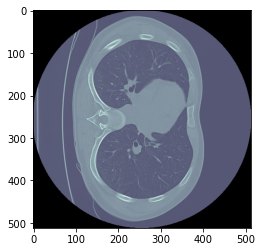

In [11]:
import matplotlib.pyplot as plt

# #for i in range (1,5):
# data = train_dataset.take(1)
# images, labels = list(data)[0]
# images = images.numpy()
# image = images[0]


image = nib.load("F:\Dataset\Train\TRN_0063.nii.gz")
image = image.get_fdata()

print("Dimension of the CT scan",1,"is:", image.shape)
plt.imshow(np.squeeze(image[:, :, 63]),cmap=plt.cm.bone)



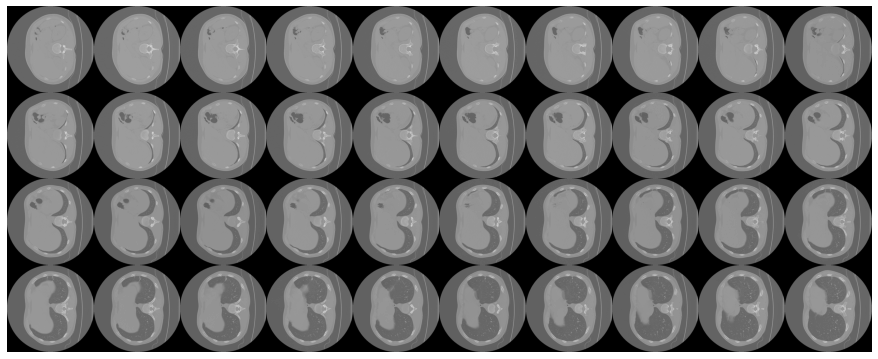

In [12]:
def plot_slices(num_rows, num_columns, width, height, data):
    """Plot a montage of 20 CT slices"""
    data = np.rot90(np.array(data))
    data = np.transpose(data)
    data = np.reshape(data, (num_rows, num_columns, width, height))
    rows_data, columns_data = data.shape[0], data.shape[1]
    heights = [slc[0].shape[0] for slc in data]
    widths = [slc.shape[1] for slc in data[0]]
    fig_width = 12.0
    fig_height = fig_width * sum(heights) / sum(widths)
    f, axarr = plt.subplots(
        rows_data,
        columns_data,
        figsize=(fig_width, fig_height),
        gridspec_kw={"height_ratios": heights},
    )
    for i in range(rows_data):
        for j in range(columns_data):
            axarr[i, j].imshow(data[i][j], cmap="gray")
            axarr[i, j].axis("off")
    plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)
    plt.show()


# Visualize montage of slices.
# 4 rows and 10 columns for 100 slices of the CT scan.
plot_slices(4, 10, 512, 512, image[:, :, :40])


In [22]:
def get_model(width=128, height=128, depth=64):
    """Build a 3D convolutional neural network model."""

    inputs = keras.Input((width, height, depth, 1))

    x = layers.Conv3D(filters=64, kernel_size=3, activation="softmax")(inputs)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(filters=64, kernel_size=3, activation="softmax")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(filters=128, kernel_size=3, activation="softmax")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(filters=256, kernel_size=3, activation="softmax")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.GlobalAveragePooling3D()(x)
    x = layers.Dense(units=512, activation="softmax")(x)
    x = layers.Dropout(0.3)(x)

    outputs = layers.Dense(units=5, activation="softmax")(x)

    # Define the model.
    model = keras.Model(inputs, outputs, name="3dcnn")
    return model

# Build model.
model = get_model(width=128, height=128, depth=64)
model.summary()


Model: "3dcnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 128, 128, 64, 1)] 0         
_________________________________________________________________
conv3d_12 (Conv3D)           (None, 126, 126, 62, 64)  1792      
_________________________________________________________________
max_pooling3d_12 (MaxPooling (None, 63, 63, 31, 64)    0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 63, 63, 31, 64)    256       
_________________________________________________________________
conv3d_13 (Conv3D)           (None, 61, 61, 29, 64)    110656    
_________________________________________________________________
max_pooling3d_13 (MaxPooling (None, 30, 30, 14, 64)    0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 30, 30, 14, 64)    256   

In [23]:
initial_learning_rate = 0.0001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
    metrics=["acc"],
)

# Define callbacks.
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "F:/Dataset/3d_image_classification.h5", save_best_only=True
)

early_stopping_cb = keras.callbacks.EarlyStopping(monitor="val_acc", patience=15)



In [24]:
# Train the model, doing validation at the end of each epoch

epochs = 20
model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs,
    shuffle=True,
    verbose=1,
    callbacks=[checkpoint_cb, early_stopping_cb],
)

Epoch 1/20
105/105 [==============================] - 28s 255ms/step - loss: 1.6050 - acc: 0.4833 - val_loss: 1.5886 - val_acc: 0.8333
Epoch 2/20
105/105 [==============================] - 27s 257ms/step - loss: 1.5819 - acc: 0.8538 - val_loss: 1.5642 - val_acc: 0.8333
Epoch 3/20
105/105 [==============================] - 27s 257ms/step - loss: 1.5576 - acc: 0.8372 - val_loss: 1.5365 - val_acc: 0.8333
Epoch 4/20
105/105 [==============================] - 28s 260ms/step - loss: 1.5335 - acc: 0.7976 - val_loss: 1.5056 - val_acc: 0.8333
Epoch 5/20
105/105 [==============================] - 27s 255ms/step - loss: 1.4965 - acc: 0.8397 - val_loss: 1.4688 - val_acc: 0.8333
Epoch 6/20
105/105 [==============================] - 28s 263ms/step - loss: 1.4628 - acc: 0.8327 - val_loss: 1.4057 - val_acc: 0.8333
Epoch 7/20
105/105 [==============================] - 28s 263ms/step - loss: 1.4268 - acc: 0.8410 - val_loss: 1.3558 - val_acc: 0.8333
Epoch 8/20
105/105 [==============================] - 2

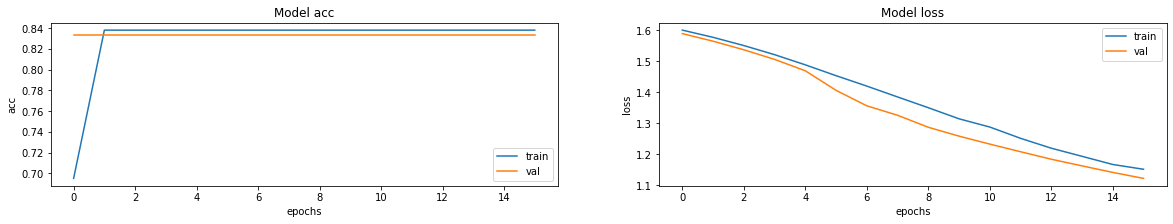

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()

for i, metric in enumerate(["acc", "loss"]):
    ax[i].plot(model.history.history[metric])
    ax[i].plot(model.history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])


In [33]:
# Load best weights.

model.load_weights("F:/Dataset/3d_image_classification.h5")

for i in range(len(x_val)):
    
    prediction = model.predict(np.expand_dims(x_val[i], axis=0))
    #print(y_val[i])
    scores = prediction
    class_names=str(y_val[i])


    for score, name in zip(scores, class_names):
        print(score[0])
        print(
            "This model is %.2f percent confident that CT scan is %s"
            % ((100 * score[0]), name)
        )

0.37420526
This model is 37.42 percent confident that CT scan is 0
0.37399343
This model is 37.40 percent confident that CT scan is 0
0.3737192
This model is 37.37 percent confident that CT scan is 0
0.37360117
This model is 37.36 percent confident that CT scan is 0
0.37384877
This model is 37.38 percent confident that CT scan is 0
0.373345
This model is 37.33 percent confident that CT scan is 0
0.37357238
This model is 37.36 percent confident that CT scan is 0
0.37364483
This model is 37.36 percent confident that CT scan is 0
0.37333477
This model is 37.33 percent confident that CT scan is 0
0.37343913
This model is 37.34 percent confident that CT scan is 0
0.3733641
This model is 37.34 percent confident that CT scan is 0
0.37339774
This model is 37.34 percent confident that CT scan is 0
0.37346652
This model is 37.35 percent confident that CT scan is 0
0.37341094
This model is 37.34 percent confident that CT scan is 0
0.3733935
This model is 37.34 percent confident that CT scan is 0


In [41]:
model.load_weights("F:/Dataset/3d_image_classification.h5")
for i in range (90):
    prediction = model.predict(np.expand_dims(x_val[i], axis=0))[0]
    scores = prediction
    print(scores)
    class_names = ["1", "2", "3", "4", "5"]
    for score, name in zip(scores, class_names):
        print(score)
        print(
        "This model is %.2f percent confident that CT scan is %s"
        % ((100 * score), name)
        )

[0.37420526 0.16992247 0.13618349 0.16860393 0.15108491]
0.37420526
This model is 37.42 percent confident that CT scan is 1
0.16992247
This model is 16.99 percent confident that CT scan is 2
0.13618349
This model is 13.62 percent confident that CT scan is 3
0.16860393
This model is 16.86 percent confident that CT scan is 4
0.15108491
This model is 15.11 percent confident that CT scan is 5
[0.37399343 0.17061912 0.13590162 0.16851531 0.15097053]
0.37399343
This model is 37.40 percent confident that CT scan is 1
0.17061912
This model is 17.06 percent confident that CT scan is 2
0.13590162
This model is 13.59 percent confident that CT scan is 3
0.16851531
This model is 16.85 percent confident that CT scan is 4
0.15097053
This model is 15.10 percent confident that CT scan is 5
[0.3737192  0.17298064 0.13470256 0.16820605 0.15039158]
0.3737192
This model is 37.37 percent confident that CT scan is 1
0.17298064
This model is 17.30 percent confident that CT scan is 2
0.13470256
This model is 1

[0.37488794 0.16697726 0.13749275 0.16898425 0.15165779]
0.37488794
This model is 37.49 percent confident that CT scan is 1
0.16697726
This model is 16.70 percent confident that CT scan is 2
0.13749275
This model is 13.75 percent confident that CT scan is 3
0.16898425
This model is 16.90 percent confident that CT scan is 4
0.15165779
This model is 15.17 percent confident that CT scan is 5
[0.37354347 0.17376412 0.1343572  0.1681031  0.15023212]
0.37354347
This model is 37.35 percent confident that CT scan is 1
0.17376412
This model is 17.38 percent confident that CT scan is 2
0.1343572
This model is 13.44 percent confident that CT scan is 3
0.1681031
This model is 16.81 percent confident that CT scan is 4
0.15023212
This model is 15.02 percent confident that CT scan is 5
[0.37354317 0.17127521 0.13578251 0.16845459 0.1509445 ]
0.37354317
This model is 37.35 percent confident that CT scan is 1
0.17127521
This model is 17.13 percent confident that CT scan is 2
0.13578251
This model is 13

[0.37367722 0.17318954 0.13460687 0.16817869 0.15034771]
0.37367722
This model is 37.37 percent confident that CT scan is 1
0.17318954
This model is 17.32 percent confident that CT scan is 2
0.13460687
This model is 13.46 percent confident that CT scan is 3
0.16817869
This model is 16.82 percent confident that CT scan is 4
0.15034771
This model is 15.03 percent confident that CT scan is 5
[0.37365326 0.17320773 0.1346113  0.16817851 0.15034917]
0.37365326
This model is 37.37 percent confident that CT scan is 1
0.17320773
This model is 17.32 percent confident that CT scan is 2
0.1346113
This model is 13.46 percent confident that CT scan is 3
0.16817851
This model is 16.82 percent confident that CT scan is 4
0.15034917
This model is 15.03 percent confident that CT scan is 5
[0.37337312 0.17430186 0.13415088 0.16802987 0.15014417]
0.37337312
This model is 37.34 percent confident that CT scan is 1
0.17430186
This model is 17.43 percent confident that CT scan is 2
0.13415088
This model is 1

[0.3735651  0.1736318  0.13442115 0.16811937 0.15026261]
0.3735651
This model is 37.36 percent confident that CT scan is 1
0.1736318
This model is 17.36 percent confident that CT scan is 2
0.13442115
This model is 13.44 percent confident that CT scan is 3
0.16811937
This model is 16.81 percent confident that CT scan is 4
0.15026261
This model is 15.03 percent confident that CT scan is 5
[0.3734608  0.17417012 0.13417144 0.16805032 0.1501473 ]
0.3734608
This model is 37.35 percent confident that CT scan is 1
0.17417012
This model is 17.42 percent confident that CT scan is 2
0.13417144
This model is 13.42 percent confident that CT scan is 3
0.16805032
This model is 16.81 percent confident that CT scan is 4
0.1501473
This model is 15.01 percent confident that CT scan is 5
[0.3748214  0.16554987 0.13832475 0.16920543 0.15209854]
0.3748214
This model is 37.48 percent confident that CT scan is 1
0.16554987
This model is 16.55 percent confident that CT scan is 2
0.13832475
This model is 13.83